In [1]:
%matplotlib inline
from scipy.stats import binom, norm
from numpy import linspace
from matplotlib.pyplot import figure, savefig, ylim, gca, plot, fill_between
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

In [2]:
def f(n= 20, mu0=75, mu= 75, sigma=9.5, alpha=0.05, tail='upper', error='I'):
    
    x   = linspace( mu0-sigma, mu0+sigma , 800 )
    
    sigma = round (sigma/n**(1/2), 1)
    zalpha1 = norm.ppf(  alpha, mu0, sigma)
    zalpha2 = norm.ppf(1-alpha, mu0, sigma)
 
    def fill(w1,w2, color='red', x=x, sigma=sigma, mu=mu0):
        where = [ w1[i] or w2[i] for i in range(len(w1)) ]
        fill_between(x, norm.pdf(x,mu,sigma), where=where, color=color)
        return None
   
    x1 = [ x[i] <=zalpha1 for i in range(len(x)) ]    
    x3 = [ x[i] >=zalpha2 for i in range(len(x)) ]
    x2 = [ not (x1[i] or x3[i])  for i in range(len(x)) ]
              
    figure( figsize=(13,5) )
    
    if ( tail=='upper' or tail=='two'):
        plot([zalpha2]*2, [0,1], linestyle='--', color='black')
        gca().annotate( 'Rifiuto', 
                    xy=(norm.ppf(1-alpha)/8+0.5, 0.9),  
                    color='red', 
                    xycoords='axes fraction' )
        
    if ( tail=='lower' or tail=='two' ):
        plot([zalpha1]*2, [0,1], linestyle='--', color='black') 
        gca().annotate( 'Rifiuto',
                        xy=(norm.ppf(alpha)/8+0.5, 0.9),
                        color='red',
                        horizontalalignment='right', 
                        xycoords='axes fraction' )
    if (error=='I'):
        gca().annotate(r'$\alpha= P(T_+|H_0)\ \simeq\ ${:.2f}'.format(alpha), 
                       xy=(0.98,0.45), 
                       color='red', 
                       horizontalalignment='right', 
                       xycoords='axes fraction') 
        gca().annotate( '$n={}$\n $\mu_0=\mu={}$\n $\sigma/\sqrt n={}$'.format(n,mu,sigma), 
                        xy=(0.02, 0.65), 
                        linespacing=1.8, 
                        xycoords='axes fraction' )
    if (error=='II'):
        if (mu>mu0): xy=(0.02,0.45); al='left' 
        else:  xy=(0.98,0.45); al='right' 
        
        gca().annotate(r'$\beta=P(T_-|H_{{{}}})\ \simeq\ ${:.2f}'.format(mu,alpha),
                    color='blue',  
                    xy=xy, 
                    horizontalalignment=al, 
                    xycoords='axes fraction')
        gca().annotate( '$n={}$\n $\mu_0<\mu={}$\n $\sigma/\sqrt n={}$'.format(n,mu,sigma), 
                        xy=(0.02, 0.65), 
                        linespacing=1.8, 
                        xycoords='axes fraction' ) 
        

    
    gca().annotate( 'Non Rifiuto', xy=(0.5, 0.9), 
                    horizontalalignment='center', 
                    xycoords='axes fraction' )
    
    plot(x, norm.pdf(x,mu,sigma), color='black', lw=2 )
    
    if (tail=='lower' and error=='I'): fill(x1, x1, mu=mu0)
    if (tail=='upper' and error=='I'): fill(x3, x3, mu=mu0)
    if (tail=='two'   and error=='I'): fill(x1, x3, mu=mu0)
    if (tail=='lower' and error=='II'): fill(x2, x3, color='blue', mu=mu)
    if (tail=='upper' and error=='II'): fill(x1, x2, color='blue', mu=mu)
    if (tail=='two'   and error=='II'): fill(x2, x2, color='blue', mu=mu)

    return None

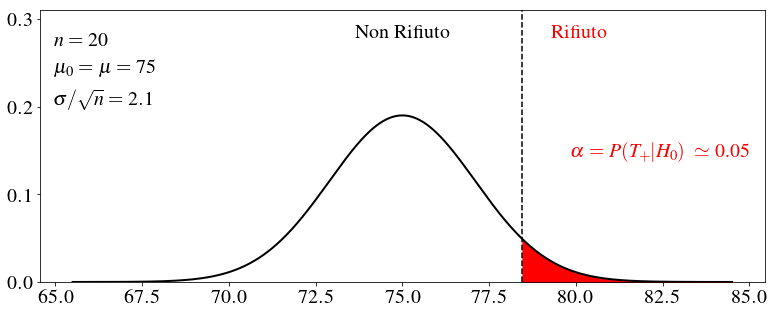

In [3]:
f(n=20, mu0=75, mu=75, sigma=9.5, alpha=0.05, tail='upper', error='I')
ylim(0, 0.31)
savefig('Z-test_01.pdf',bbox_inches='tight')

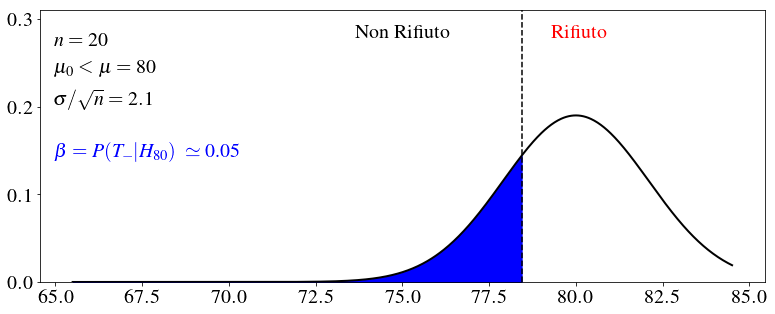

In [4]:
f(n=20, mu=80, sigma=9.5, alpha=0.05, tail='upper', error='II')
ylim(0, 0.31)
savefig('Z-test_02.pdf',bbox_inches='tight')

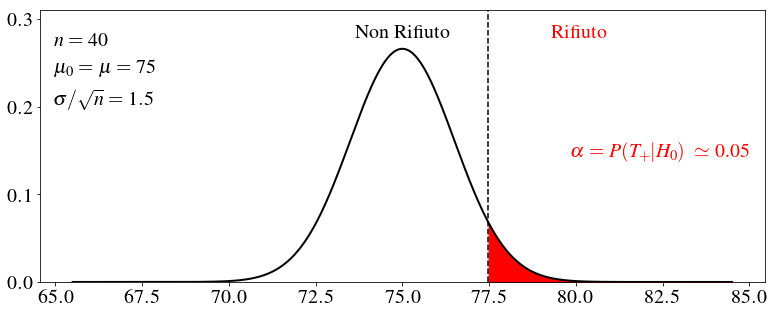

In [5]:
f(n=40, mu0=75, mu=75, sigma=9.5, alpha=0.05, tail='upper', error='I')
ylim(0, 0.31)
savefig('Z-test_03.pdf',bbox_inches='tight')

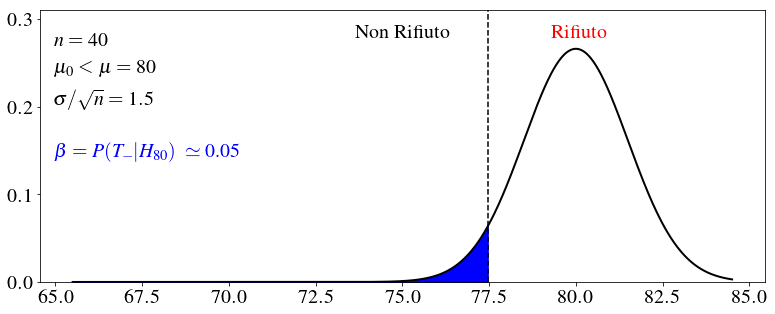

In [6]:
f(n=40, mu=80, sigma=9.5, alpha=0.05, tail='upper', error='II')
ylim(0, 0.31)
savefig('Z-test_04.pdf',bbox_inches='tight')